# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [ ]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

In [ ]:
# Looking into the information
url = f"https://api.openweathermap.org/data/2.5/weather?q=albany&appid={weather_api_key}"

response = requests.get(url)

print(response.json())


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [ ]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        response = requests.get(city_url)

        status_code = response.status_code

        if status_code == 200:
            city_weather = response.json()
        else:
            city_weather = {} #failed request

        # Extraction
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather.get("coord", {}).get("lat")
        city_lng = city_weather.get("coord", {}).get("lon")
        city_max_temp = city_weather.get("main", {}).get("temp_max")
        city_humidity = city_weather.get("main", {}).get("humidity")
        city_clouds = city_weather.get("clouds", {}).get("all")
        city_wind = city_weather.get("wind", {}).get("speed")
        city_country = city_weather.get("sys", {}).get("country")
        city_date = city_weather.get("dt")
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:
        print("City not found. Skipping...")
        print(e)
        pass

    # sleep for 1 second
    time.sleep(1)
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

In [ ]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

In [ ]:
# Display sample data
city_data_df.head()

In [ ]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities_Rivers.csv", index_label="City_ID")

Use from here and down when restarting the Kernel after running the imports

In [4]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities_Rivers.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,305.40,72.0,40.0,1.54,US,1.720295e+09
1,sedalia,38.7045,-93.2283,303.11,48.0,0.0,0.00,US,1.720295e+09
2,nagqu,31.5000,92.0000,279.15,89.0,100.0,0.92,CN,1.720295e+09
3,puerto natales,-51.7236,-72.4875,269.40,100.0,100.0,0.00,CL,1.720295e+09
4,russkaya polyana,49.4170,31.9201,290.64,58.0,3.0,3.38,UA,1.720295e+09


In [6]:
city_data_df.count()

City          599
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       569
Date          576
dtype: int64

In [8]:
# convert the temperature to celsius
# K - 273.15 to the column to convert temperatures from Kelvin to Celsius.
city_data_df['Max Temp'] = city_data_df['Max Temp'] - 273.15
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,32.25,72.0,40.0,1.54,US,1.720295e+09
1,sedalia,38.7045,-93.2283,29.96,48.0,0.0,0.00,US,1.720295e+09
2,nagqu,31.5000,92.0000,6.00,89.0,100.0,0.92,CN,1.720295e+09
3,puerto natales,-51.7236,-72.4875,-3.75,100.0,100.0,0.00,CL,1.720295e+09
4,russkaya polyana,49.4170,31.9201,17.49,58.0,3.0,3.38,UA,1.720295e+09


In [14]:
city_data_df['Date'] = pd.to_datetime(city_data_df['Date'], unit='s')
city_data_df['Date'] = city_data_df['Date'].dt.date
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,32.25,72.0,40.0,1.54,US,2024-07-06
1,sedalia,38.7045,-93.2283,29.96,48.0,0.0,0.00,US,2024-07-06
2,nagqu,31.5000,92.0000,6.00,89.0,100.0,0.92,CN,2024-07-06
3,puerto natales,-51.7236,-72.4875,-3.75,100.0,100.0,0.00,CL,2024-07-06
4,russkaya polyana,49.4170,31.9201,17.49,58.0,3.0,3.38,UA,2024-07-06
5,hermanus,-34.4187,19.2345,11.56,50.0,85.0,3.91,ZA,2024-07-06
6,port-aux-francais,-49.3500,70.2167,2.38,94.0,81.0,14.83,TF,2024-07-06
7,west island,-12.1568,96.8225,27.99,78.0,51.0,6.17,CC,2024-07-06
8,blackmans bay,-43.0167,147.3167,0.96,95.0,97.0,0.45,AU,2024-07-06


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

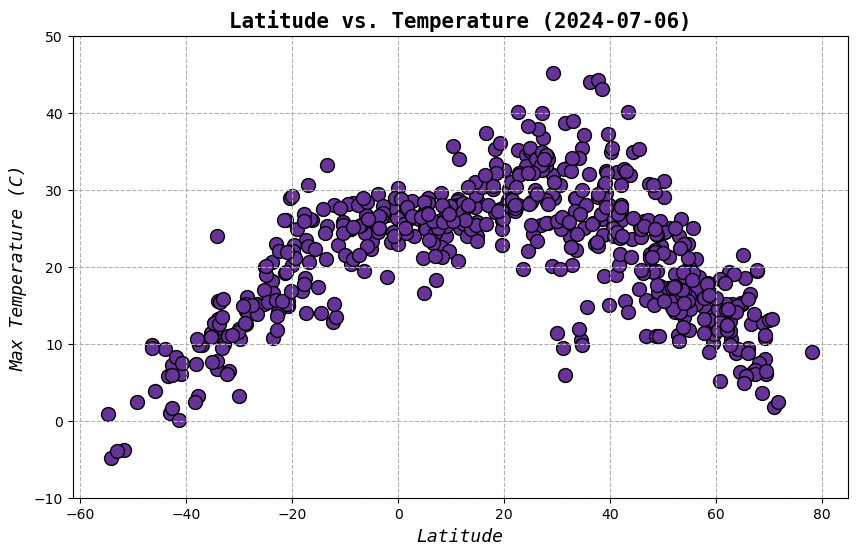

In [20]:
# Build scatter plot for latitude vs. temperature
x = city_data_df["Lat"]
y = city_data_df["Max Temp"]

plt.figure(figsize=(10, 6))

plt.scatter(x, y, facecolor="rebeccapurple", edgecolor="black", s=100)

# Incorporate the other graph properties
plt.title("Latitude vs. Temperature (2024-07-06)", fontweight="bold", fontsize=15, fontname="monospace")
plt.xlabel("Latitude", fontstyle="italic", fontsize=13, fontname="monospace")
plt.ylabel("Max Temperature (C)", fontstyle="italic", fontsize=13, fontname="monospace")
plt.grid(True, linestyle='--')

plt.xticks([-60, -40, -20, 0, 20, 40, 60, 80])
plt.yticks([-10, 0, 10, 20, 30, 40, 50])

# Save the figure
plt.savefig("output_data/Fig1_Rivers.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

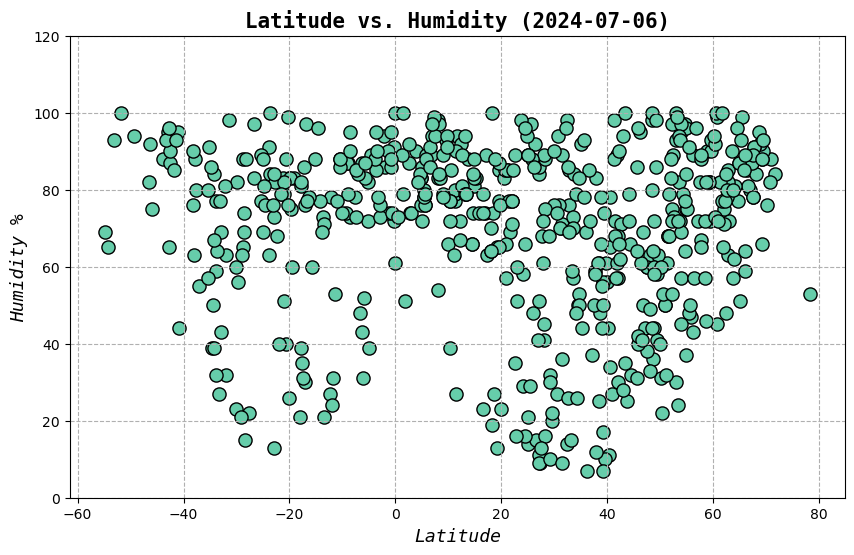

In [28]:
# Build the scatter plots for latitude vs. humidity
x = city_data_df["Lat"]
y = city_data_df["Humidity"]

plt.figure(figsize=(10, 6))

plt.scatter(x, y, facecolor="mediumaquamarine", edgecolor="black", s=90)

# Incorporate the other graph properties
plt.title("Latitude vs. Humidity (2024-07-06)", fontweight="bold", fontsize=15, fontname="monospace")
plt.xlabel("Latitude", fontstyle="italic", fontsize=13, fontname="monospace")
plt.ylabel("Humidity %", fontstyle="italic", fontsize=13, fontname="monospace")
plt.grid(True, linestyle='--')

plt.xticks([-60, -40, -20, 0, 20, 40, 60, 80])
plt.yticks([0, 20, 40, 60, 80, 100, 120])

# Save the figure
plt.savefig("output_data/Fig2_Rivers.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

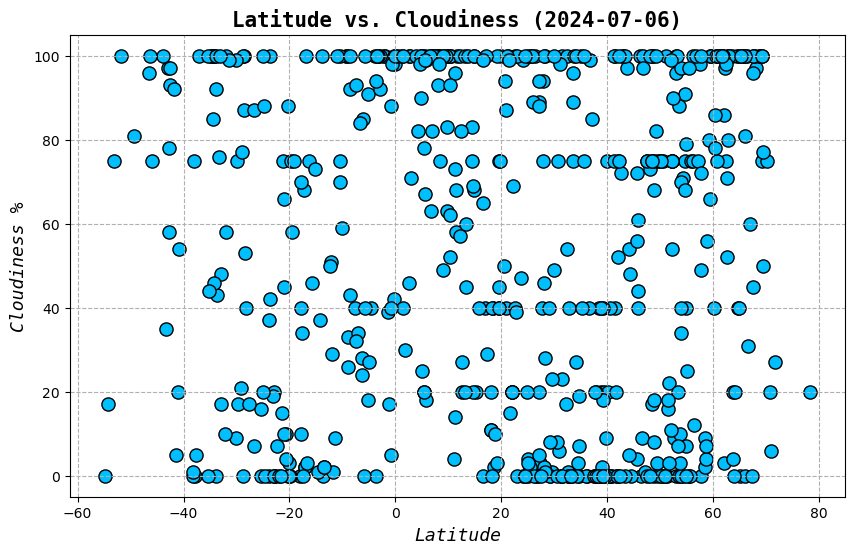

In [34]:
# Build the scatter plots for latitude vs. cloudiness
x = city_data_df["Lat"]
y = city_data_df["Cloudiness"]

plt.figure(figsize=(10, 6))

plt.scatter(x, y, facecolor="deepskyblue", edgecolor="black", s=90)

# Incorporate the other graph properties
plt.title("Latitude vs. Cloudiness (2024-07-06)", fontweight="bold", fontsize=15, fontname="monospace")
plt.xlabel("Latitude", fontstyle="italic", fontsize=13, fontname="monospace")
plt.ylabel("Cloudiness %", fontstyle="italic", fontsize=13, fontname="monospace")
plt.grid(True, linestyle='--')

plt.xticks([-60, -40, -20, 0, 20, 40, 60, 80])
plt.yticks([0, 20, 40, 60, 80, 100])

# Save the figure
plt.savefig("output_data/Fig3_Rivers.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

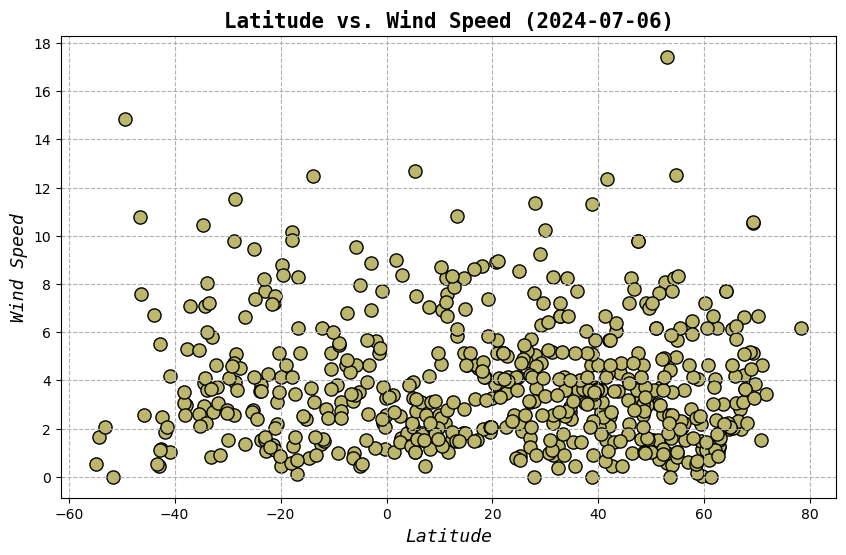

In [40]:
# Build the scatter plots for latitude vs. wind speed
x = city_data_df["Lat"]
y = city_data_df["Wind Speed"]

plt.figure(figsize=(10, 6))

plt.scatter(x, y, facecolor="darkkhaki", edgecolor="black", s=90)

# Incorporate the other graph properties
plt.title("Latitude vs. Wind Speed (2024-07-06)", fontweight="bold", fontsize=15, fontname="monospace")
plt.xlabel("Latitude", fontstyle="italic", fontsize=13, fontname="monospace")
plt.ylabel("Wind Speed", fontstyle="italic", fontsize=13, fontname="monospace")
plt.grid(True, linestyle='--')

plt.xticks([-60, -40, -20, 0, 20, 40, 60, 80])
plt.yticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18])

# Save the figure
plt.savefig("output_data/Fig4_Rivers.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [76]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_title, y_title, text_coordinates):
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x = " + str(round(intercept,2))

    # Plot
    plt.figure(figsize=(10, 6))
    plt.scatter(x_values, y_values, facecolor="salmon", edgecolor="black", s=90)
    plt.plot(x_values, regress_values, "r-")

    
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel(x_title, fontsize=13, fontstyle="italic", fontname="monospace")
    plt.ylabel(y_title, fontsize=12, fontstyle="italic", fontname="monospace")
    plt.title(f"{x_title} vs {y_title}", fontweight="bold", fontsize=15, fontname="monospace")
    
    print(f"The r-squared is: {rvalue**2}") 
    plt.show()

In [78]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df.Lat >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,32.25,72.0,40.0,1.54,US,2024-07-06
1,sedalia,38.7045,-93.2283,29.96,48.0,0.0,0.00,US,2024-07-06
2,nagqu,31.5000,92.0000,6.00,89.0,100.0,0.92,CN,2024-07-06
4,russkaya polyana,49.4170,31.9201,17.49,58.0,3.0,3.38,UA,2024-07-06
10,bereket,39.2446,55.5154,32.42,17.0,0.0,3.71,TM,2024-07-06


In [80]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df.Lat < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,puerto natales,-51.7236,-72.4875,-3.75,100.0,100.0,0.00,CL,2024-07-06
5,hermanus,-34.4187,19.2345,11.56,50.0,85.0,3.91,ZA,2024-07-06
6,port-aux-francais,-49.3500,70.2167,2.38,94.0,81.0,14.83,TF,2024-07-06
7,west island,-12.1568,96.8225,27.99,78.0,51.0,6.17,CC,2024-07-06
8,blackmans bay,-43.0167,147.3167,0.96,95.0,97.0,0.45,AU,2024-07-06


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.39876985689276456


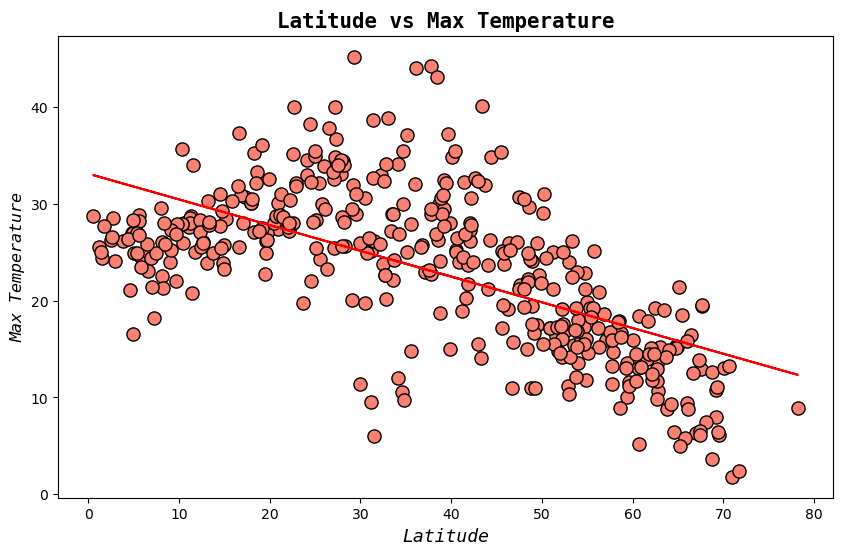

<Figure size 640x480 with 0 Axes>

In [100]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Latitude", "Max Temperature", (0,90))



The r-squared is: 0.7519000474943291


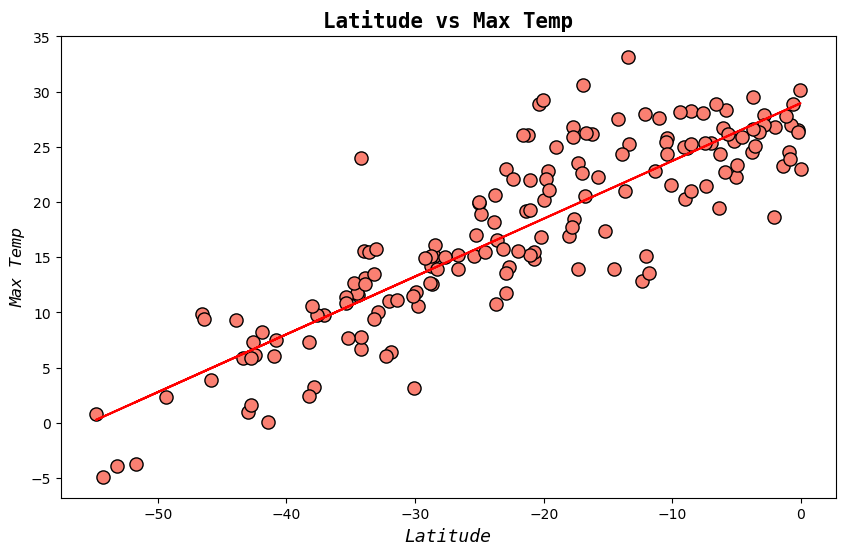

<Figure size 640x480 with 0 Axes>

In [102]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Latitude", "Max Temp", (-90, 0))



**Discussion about the linear relationship:** In the Northern Hemisphere's Linear Regression of the Latitude vs Max Temperature, the line indicates that as the number for the latitude gets higher above 0, the temperature gets lower, meaning the further you are above the equator, the lower the temperature while the Southern Hemisphere below the equator indicates that the further below the equator the latitude, the colder the temperature is. Although the R-Squared value on the Northern Hemisphere is lower than expected, both of these visualizations allow us to make the prediction that the closer you are to the equator, the warmer it will be.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 4.616394888127417e-05


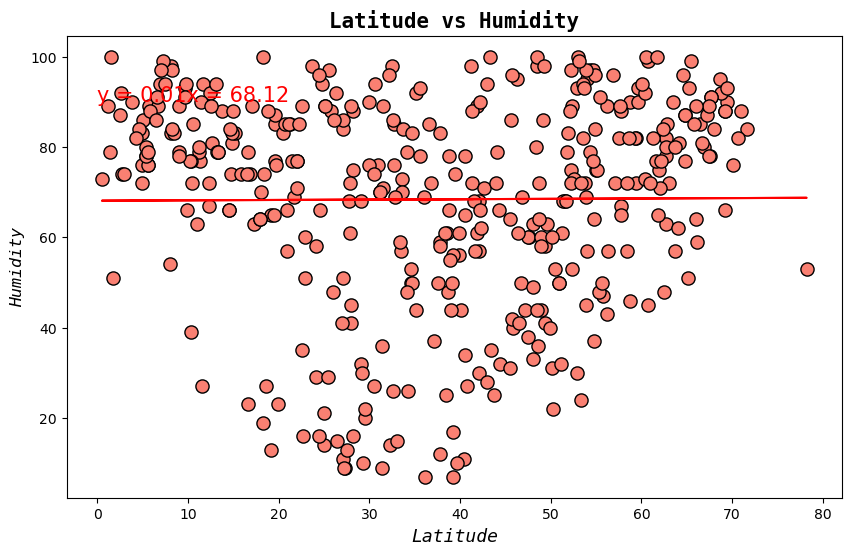

<Figure size 640x480 with 0 Axes>

In [104]:
# Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Latitude", "Humidity", (0,90))



The r-squared is: 0.0003190810591902229


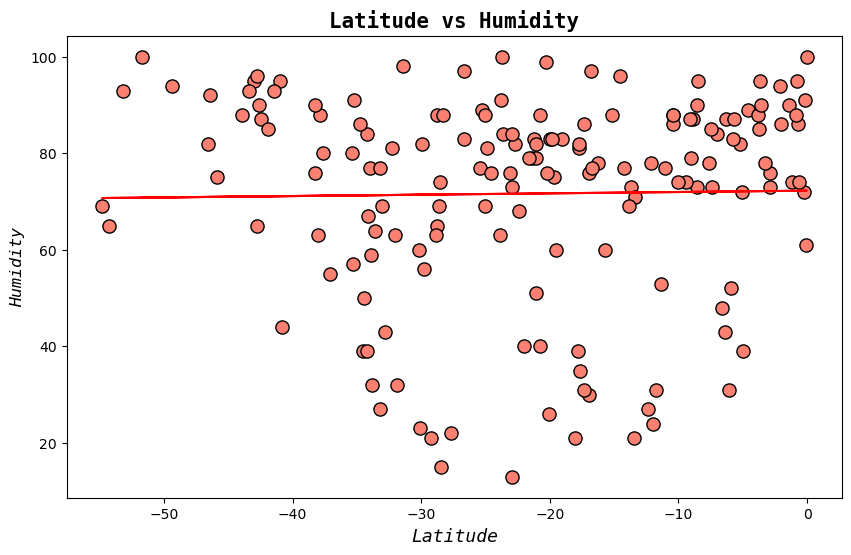

<Figure size 640x480 with 0 Axes>

In [106]:
# Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Latitude", "Humidity", (-90, 0))



**Discussion about the linear relationship:** Both Linear Regressions for Northern and Southern Hemisphere Latitude vs Humidity display the image that there is not a good enough relationship between latitude and humidity to make an accurate prediction. The R-Squared values are above 4 or almost 0, and the residuals are all over the image.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.003413506944035178


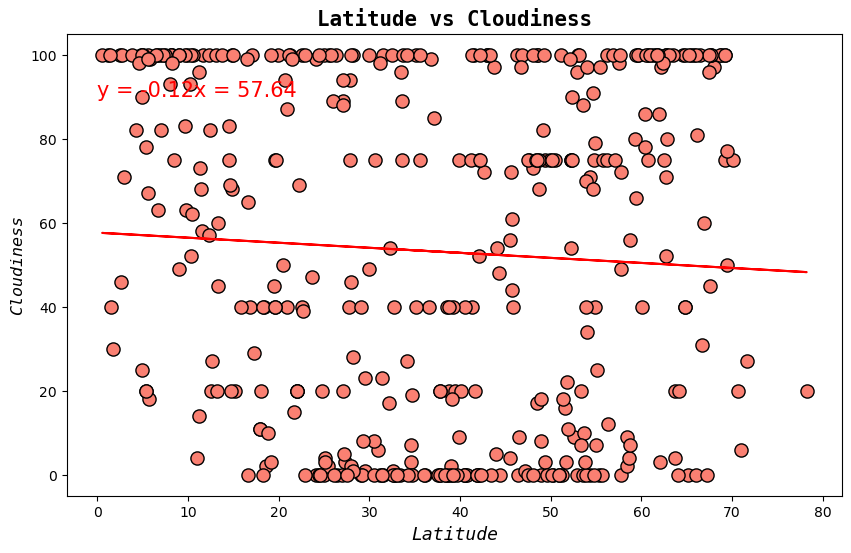

<Figure size 640x480 with 0 Axes>

In [112]:
# Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness", (0,90))



The r-squared is: 1.087313530635598e-05


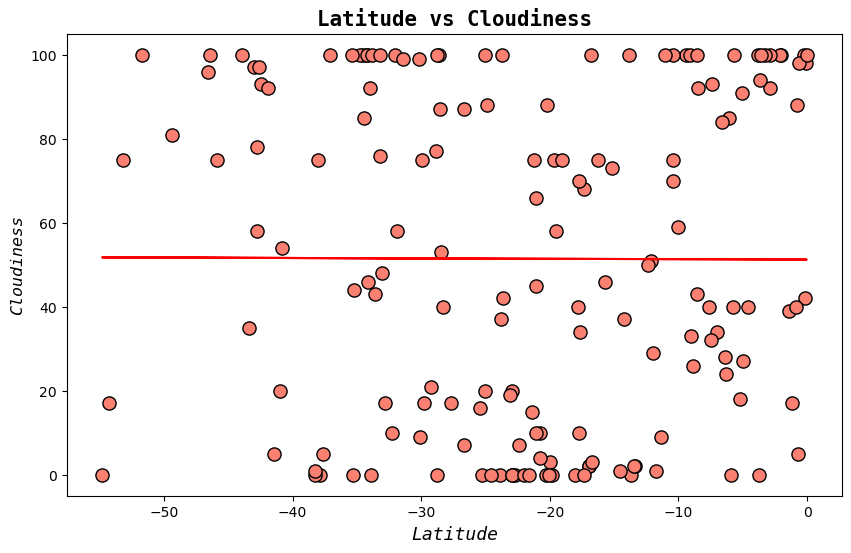

<Figure size 640x480 with 0 Axes>

In [116]:
# Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness", (-90,0))



**Discussion about the linear relationship:** The r-squared values as well as the residuals indicate that there is not a strong coorelation between Latitude and Cloudiness for either the Northern or Southern Hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.0007237854715476614


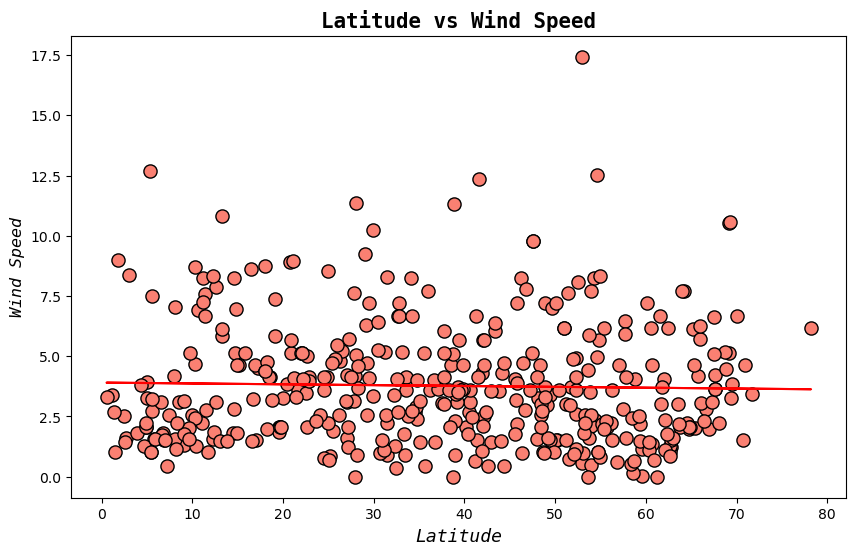

<Figure size 640x480 with 0 Axes>

In [122]:
# Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Latitude", "Wind Speed", (0,90))



The r-squared is: 0.0002462663305512253


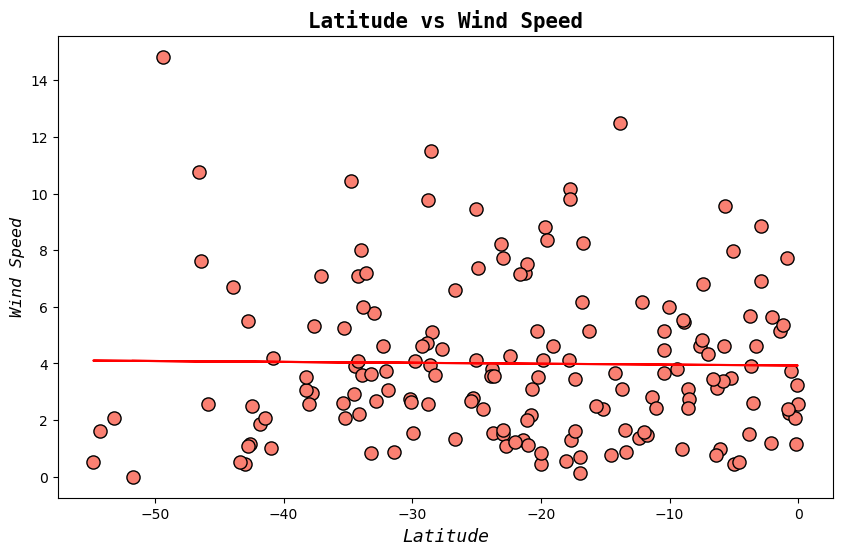

<Figure size 640x480 with 0 Axes>

In [124]:
# Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Latitude", "Wind Speed", (-90, 0))



**Discussion about the linear relationship:** Similarly to Latitude of Humidity and Cloudiness in relation to the latitude, the r-squared values and the residuals indicate that there isn't a strong coorelation between Latitude and Wind Speed.